### Tobin's Q
- Gross profit
$$ \pi(K(t))k(t),\, \pi'(.)<0$$
- Adjustment cost
$$C(0)=0,\quad C'(0)=0,\, C''(.)>0$$
- Continuous time case:$$max. \Pi = \int_{t=0}^{\infty}[\pi(K(t))k(t)-I(t)-C(I(t))]e^{-rt}dt ,\, r=const,\, k\dot(t)=I(t)$$

- Discrete time case:$$ max. \Pi = \sum_{t=0}^{\infty} \frac{1}{(1+r)^t}[\pi(K(t))k(t)-I(t)-C(I(t))],\, I_t=k_{t+1}-k_t$$

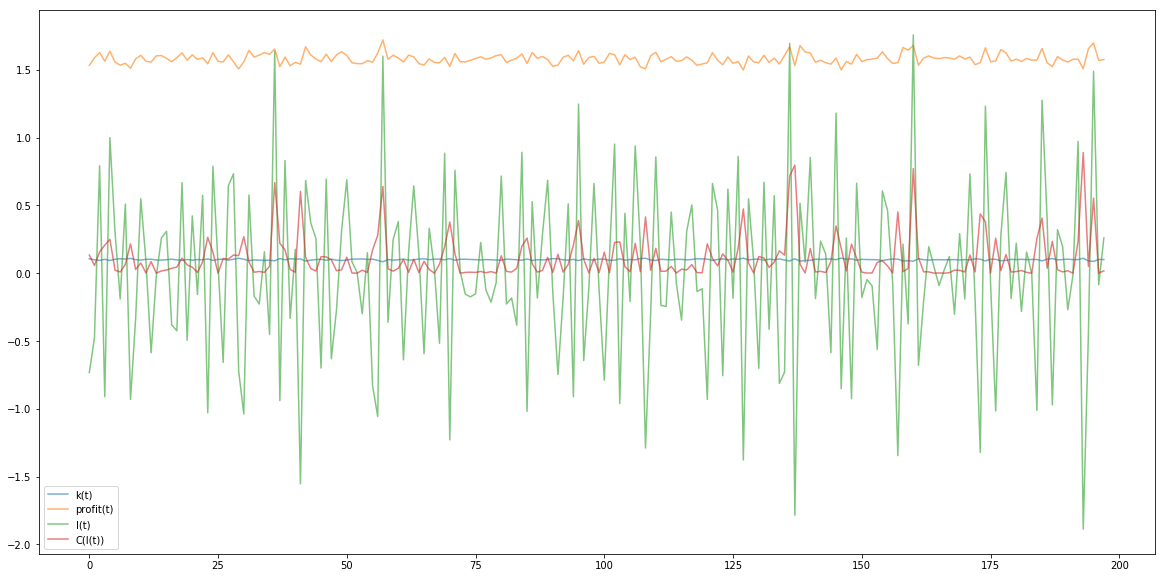

present value at period 155: 1.8895596112916775
present value at period 160: 1.8900561532318052
present value at period 165: 1.889675704777176
present value at period 170: 1.8898220799275454
present value at period 175: 1.8898974935085708
present value at period 180: 1.8900130571128566
present value is converge to : 1.89 after period 180


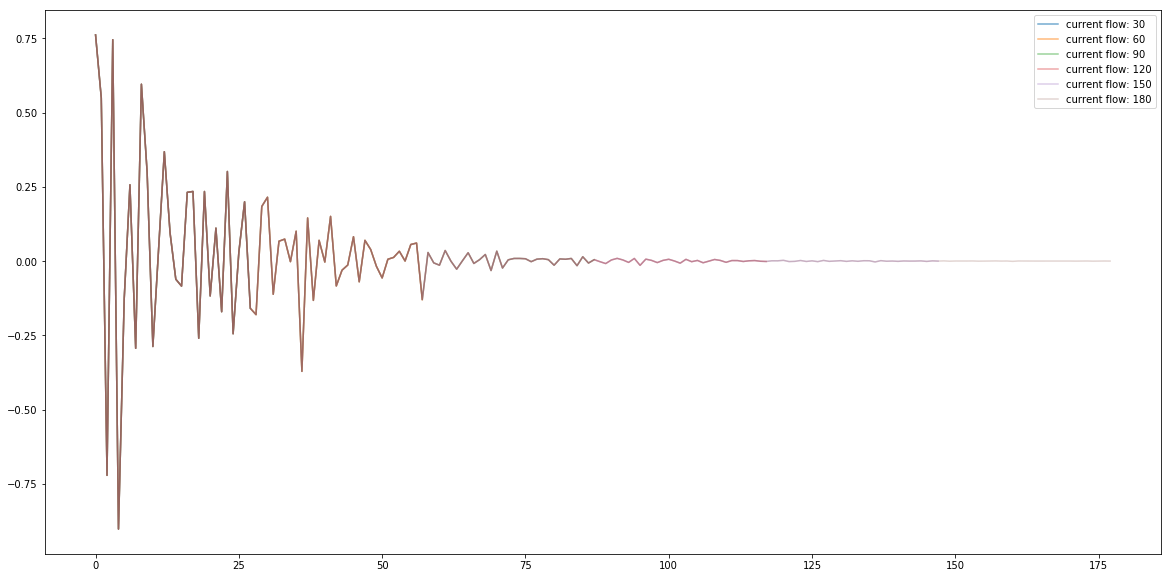

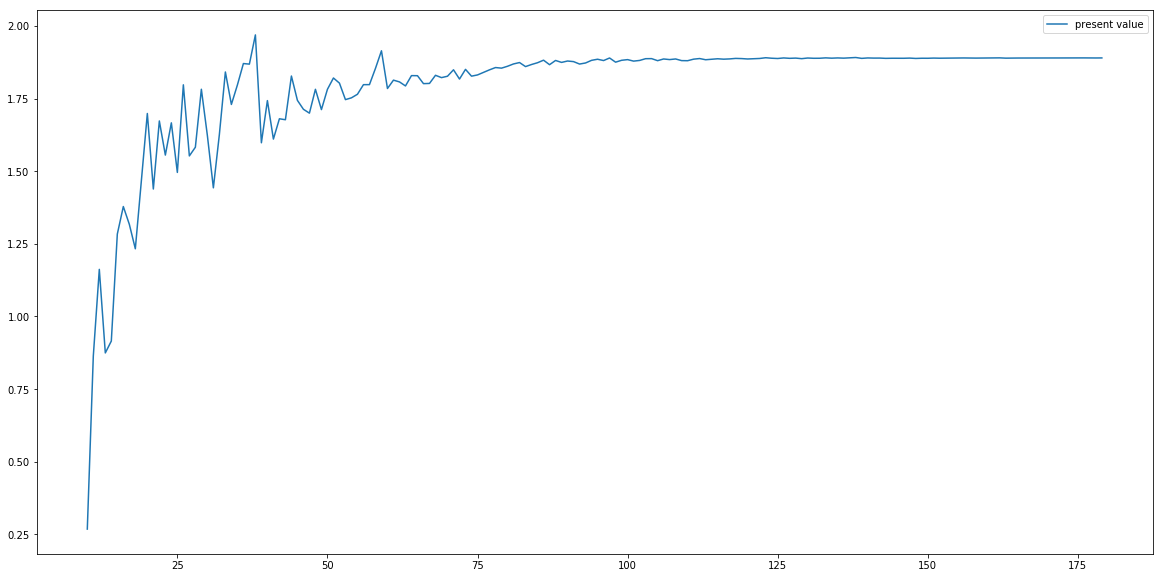

In [34]:
import numpy as np
from matplotlib import pyplot as plt

#First consider discete time case
# the following plots are just one of possible time path of state variables rather than optimal solutions
def profit(K,alpha=-0.5,coef=5):
    #K is array=type 
    return (coef*K**alpha)[:-2]#length = T-1 
def I(K):
    #K is array=type
    return K[1:-1]-K[0:-2]#length = T-1  
def C(I,coef=1/4):
    # I is array-type with length = T-1 (from 0 to T-2)
    return coef*I**2 
def k(K):
    return (K/N)[:-2]#length = T-1 = 99


def PV(K,T,r=0.05,N=100):   
    discount = np.zeros(T-2)
    for t in range(T-2):
        discount[t]=(1+r)**(-t)
#     print(len(profit(K)),len(k(K)),len(I(K)),len(C(I(K))))
    net_profit = np.multiply(discount,profit(K)*k(K)-I(K)-C(I(K)))
    return net_profit #np.sum(net_profit)


period = np.arange(10,201,1)
Y=np.zeros(len(period))
np.random.seed()
Ktot = np.random.normal(mu, sigma, period[-1])
plt.figure(figsize=(20,10))
#plt.plot(Ktot,alpha = 0.6,label = 'K(t)')
plt.plot(k(Ktot),alpha = 0.6,label = 'k(t)')
plt.plot(profit(Ktot),alpha = 0.6,label = 'profit(t)')
plt.plot(I(Ktot),alpha = 0.6,label='I(t)')
plt.plot(C(I(Ktot)),alpha = 0.6,label='C(I(t))')
plt.legend()
plt.show()

mu,sigma=10,0.5
plt.figure(figsize=(20,10))
for i,p in enumerate(period):
    #K is seen as exdogenous
    K = Ktot[:p]
    if p%30==0:
        #print(K)
        plt.plot(PV(K=K,T=p),alpha=0.7-p/400.0,label='current flow: '+str(p))
    Y[i]= np.sum(PV(K=K,T=p))
    
    if p>150 and p%5==0:
        print('present value at period '+str(p)+': '+str(Y[i]))
        if Y[i]-Y[i-1]<0.000005:
            print('present value is converge to : '+str(round(Y[i],4))+' after period '+str(p))
            plt.legend()
            plt.show()
            break
plt.figure(figsize=(20,10))            
plt.plot(period[:i],Y[:i],label='present value')
plt.legend()
plt.show()




In [23]:
# import numpy as np
# from matplotlib import pyplot as plt

# #First consider discete time case
# # the following plots are just one of possible time path of state variables rather than optimal solutions

# mu,sigma,N=10,0.5,100

# def profit(K,alpha=0.5):
#     #K is array=type 
#     return (K**alpha)#length = T 

# """index problem"""
# def k(K):
#     return (K/N)#length = T
# def I(k):
#     #K is array=type
#     return k[1:-1]-k[0:-2]#length = T-1  
# def C(I,coef=1/4):
#     # I is array-type with length = T-1 
#     return coef*I**2 



# def PV(K,T,r=0.05,N=100):   
#     discount = np.zeros(T-1)
#     for t in range(T-1):
#         discount[t]=(1+r)**(-t)
# #     print(len(profit(K)),len(k(K)),len(I(K)),len(C(I(K))))
#     capital = k(K)
#     invest = I(capital)
# """index problem"""    
    
# #     assert discount.size==capital.size
#     print(discount.size,capital.size)
#     print(invest.size)
# #     assert discount.size==invest.size
   
#     assert discount.size==C(invest).size
    
#     net_profit = np.multiply(discount,profit(K)[:-2]*capital[:-2]-invest-C(invest))
#     return net_profit #np.sum(net_profit)


# period = np.arange(10,201,1)
# Y=np.zeros(len(period))
# np.random.seed()

# Ktot = np.random.normal(mu, sigma, period[-1])
# plt.figure(figsize=(20,10))
# plt.plot(Ktot,alpha = 0.6,label = 'K(t)')
# plt.plot(k(Ktot),alpha = 0.6,label = 'k(t)')
# plt.plot(profit(Ktot),alpha = 0.6,label = 'profit(t)')
# plt.plot(I(Ktot),alpha = 0.6,label='I(t)')
# plt.plot(C(I(Ktot)),alpha = 0.6,label='C(I(t))')
# plt.legend()
# plt.show()


# plt.figure(figsize=(20,10))
# for i,p in enumerate(period):
#     #K is seen as exdogenous
#     K = Ktot[:p-1]
#     if p%30==0:
#         #print(K)
#         plt.plot(PV(K=K,T=p),alpha=0.7-p/400.0,label='current flow: '+str(p))
#     Y[i]= np.sum(PV(K=K,T=p))
    
#     if p>150 and p%5==0:
#         print('present value at period '+str(p)+': '+str(Y[i]))
#         if Y[i]-Y[i-1]<0.000005:
#             print('present value is converge to : '+str(round(Y[i],4))+' after period '+str(p))
#             plt.legend()
#             plt.show()
#             break
# plt.figure(figsize=(20,10))            
# plt.plot(period[:i],Y[:i],label='present value')
# plt.legend()
# plt.show()




### Tobin's Q
- Gross profit
$$ \pi(K(t))k(t),\, \pi'(.)<0$$
- Adjustment cost
$$C(0)=0,\quad C'(0)=0,\, C''(.)>0$$
- Continuous time case:$$max. \Pi = \int_{t=0}^{\infty}[\pi(K(t))k(t)-I(t)-C(I(t))]e^{-rt}dt ,\, r=const,\, k\dot(t)=I(t)$$

- Discrete time case:$$ max. \Pi = \sum_{t=0}^{\infty} \frac{1}{(1+r)^t}[\pi(K(t))k(t)-I(t)-C(I(t))],\, I_t=k_{t+1}-k_t$$

In [ ]:
from scipy.integrate import quad
"""
def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1
I = quad(integrand, 0, 1, args=(a,b))
"""
def integrand(t,N,r,π_coef,):
    π = π_coef*(N*

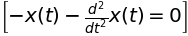

In [1]:
from sympy import Symbol, Function,init_printing
from sympy.calculus.euler import euler_equations
"""
x = Function('x')
t = Symbol('t')
init_printing()
L = (x(t).diff(t))**2/2 - x(t)**2/2
euler_equations(L, x(t), t)
"""


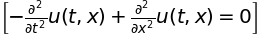

In [2]:
"""
u = Function('u')
x = Symbol('x')
init_printing()
L = (u(t, x).diff(t))**2/2 - (u(t, x).diff(x))**2/2
euler_equations(L, u(t, x), [t, x])
"""


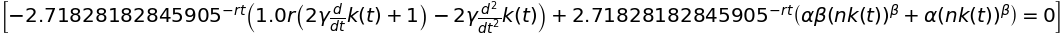

In [69]:
from sympy import mpmath as mp
init_printing(use_latex=True)

t = Symbol('t')
r = Symbol('r')
n = Symbol('n')

π = Function('π')
k = Function('k')
I = Function('I')
C = Function('C')


α= Symbol('α')
β = Symbol('β')
γ = Symbol('γ')
L3 = (α*(n*k(t))**β*k(t)-k(t).diff(t)-γ*(k(t).diff(t))**2)*mp.e**(-r*t)

euler_equations(L3,k(t),t)


$$-e^{-rt}(-2\gamma\frac{d^2}{dt^2}k(t)+r(2\gamma\frac{d}{dt}k(t)+1))+e^{-rt}(\alpha\beta(nk(t))^{\beta}+\alpha(nk(t))^{\beta})=0$$
$$-2\gamma\frac{d^2}{dt^2}k(t)+r(2\gamma\frac{d}{dt}k(t)+1)+\alpha\beta(nk(t))^{\beta}+\alpha(nk(t))^{\beta}=0$$

In [74]:
from sympy import Eq
from sympy import *
#solve the DE above
t = symbols('t')
k = Function('k')(t)
# diffeq = Eq(-2*γ*k.diff(t,2)+r*(2*γ*k.diff(t)+1)+α*β*(n*k)**β+α*(n*k)**β,0)
# α=1
# β=-0.5
# γ=1
# r=0.05
diffeq = Eq(-2*k.diff(t,2)+0.05*(2*k.diff(t)+1)-0.5*(n*k)**(-0.5)+(n*k)**(-0.5),0)
dsolve(diffeq,k)

NotImplementedError: solve: Cannot solve 0.5*(n*k(t))**(-0.5) + 0.1*Derivative(k(t), t) - 2*Derivative(k(t), t, t) + 0.05

https://stackoverflow.com/questions/19779217/need-help-solving-a-second-order-non-linear-ode-in-python